# Algorithmes génétiques

Ce carnet fait partie du [Curriculum AI pour les débutants](http://github.com/microsoft/ai-for-beginners).


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## Un peu de théorie

**Les algorithmes génétiques** (AG) reposent sur une **approche évolutive** de l'intelligence artificielle, dans laquelle les méthodes d'évolution d'une population sont utilisées pour obtenir une solution optimale à un problème donné. Ils ont été proposés en 1975 par [John Henry Holland](https://en.wikipedia.org/wiki/John_Henry_Holland).

Les algorithmes génétiques sont basés sur les idées suivantes :
* Les solutions valides au problème peuvent être représentées sous forme de **gènes**.
* Le **croisement** permet de combiner deux solutions pour obtenir une nouvelle solution valide.
* La **sélection** est utilisée pour choisir les solutions les plus optimales à l'aide d'une **fonction d'évaluation**.
* Les **mutations** sont introduites pour déstabiliser l'optimisation et sortir d'un minimum local.

Si vous souhaitez implémenter un algorithme génétique, vous aurez besoin des éléments suivants :

 * Trouver une méthode pour coder les solutions de votre problème en utilisant des **gènes** $g\in\Gamma$.
 * Sur l'ensemble des gènes $\Gamma$, définir une **fonction d'évaluation** $\mathrm{fit}: \Gamma\to\mathbb{R}$. Les valeurs plus petites de la fonction correspondent à de meilleures solutions.
 * Définir un mécanisme de **croisement** pour combiner deux gènes et obtenir une nouvelle solution valide $\mathrm{crossover}: \Gamma^2\to\Gamma$.
 * Définir un mécanisme de **mutation** $\mathrm{mutate}: \Gamma\to\Gamma$.
Dans de nombreux cas, les mécanismes de croisement et de mutation sont des algorithmes assez simples qui manipulent les gènes sous forme de séquences numériques ou de vecteurs binaires.

La mise en œuvre spécifique d'un algorithme génétique peut varier selon les cas, mais la structure générale est la suivante :

1. Sélectionner une population initiale $G\subset\Gamma$.
2. Sélectionner aléatoirement l'opération qui sera effectuée à cette étape : croisement ou mutation.
3. **Croisement** :
  * Sélectionner aléatoirement deux gènes $g_1, g_2 \in G$.
  * Calculer le croisement $g=\mathrm{crossover}(g_1,g_2)$.
  * Si $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ ou $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ - remplacer le gène correspondant dans la population par $g$.
4. **Mutation** - sélectionner un gène aléatoire $g\in G$ et le remplacer par $\mathrm{mutate}(g)$.
5. Répéter à partir de l'étape 2, jusqu'à obtenir une valeur suffisamment petite de $\mathrm{fit}$, ou jusqu'à atteindre la limite du nombre d'étapes.

Les tâches généralement résolues par les AG :
1. Optimisation des plannings
1. Emballage optimal
1. Découpe optimale
1. Accélération de la recherche exhaustive


## Problème 1 : Répartition Équitable du Trésor

**Tâche** :  
Deux personnes ont trouvé un trésor contenant des diamants de tailles différentes (et, par conséquent, de valeurs différentes). Elles doivent diviser le trésor en deux parts de manière à ce que la différence de valeur soit nulle (ou minimale).

**Définition formelle** :  
Nous avons un ensemble de nombres $S$. Nous devons le diviser en deux sous-ensembles $S_1$ et $S_2$, de sorte que $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ et $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

Tout d'abord, définissons l'ensemble $S$ :


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

Traduisons chaque solution possible du problème par un vecteur binaire $B\in\{0,1\}^N$, où le nombre à la position $i$ indique à quel ensemble ($S_1$ ou $S_2$) appartient le $i$-ème nombre dans l'ensemble original $S$. La fonction `generate` générera ces vecteurs binaires aléatoires.


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


Définissons maintenant la fonction `fit` qui calcule le "coût" de la solution. Ce sera la différence entre la somme des deux ensembles, $S_1$ et $S_2$ :


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

Nous devons maintenant définir les fonctions pour la mutation et le croisement :  
* Pour la mutation, nous sélectionnerons un bit aléatoire et nous l'inverserons (le changer de 0 à 1 et vice versa).  
* Pour le croisement, nous prendrons certains bits d'un vecteur et d'autres bits d'un autre vecteur. Nous utiliserons la même fonction `generate` pour sélectionner aléatoirement quels bits prendre de chacune des masques d'entrée.  


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

Créons une population initiale des solutions $P$ de taille `pop_size` :


In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

La fonction principale pour effectuer l'évolution. `n` représente le nombre d'étapes d'évolution à réaliser. À chaque étape :  
* Avec une probabilité de 30 %, nous effectuons une mutation et remplaçons l'élément ayant la pire fonction `fit` par l'élément muté.  
* Avec une probabilité de 70 %, nous effectuons un croisement.  

La fonction renvoie la meilleure solution (le gène correspondant à la meilleure solution) et l'historique de la fonction `fit` minimale dans la population à chaque itération.  


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


Vous pouvez voir que nous avons réussi à minimiser la fonction `fit` assez considérablement ! Voici le graphique qui montre comment la fonction `fit` pour l'ensemble de la population se comporte pendant le processus.


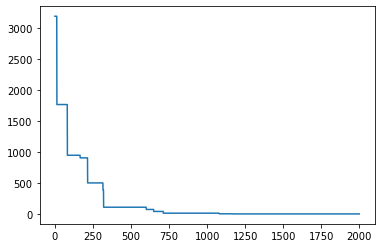

In [10]:
plt.plot(hist)
plt.show()

## Problème 2 : Problème des N reines

**Tâche** :  
Vous devez placer $N$ reines sur un échiquier de taille $N\times N$ de manière à ce qu'elles ne s'attaquent pas mutuellement.

Tout d'abord, résolvons le problème sans utiliser d'algorithmes génétiques, en utilisant une recherche exhaustive. Nous pouvons représenter l'état de l'échiquier par la liste $L$, où le $i$-ème nombre dans la liste correspond à la position horizontale de la reine dans la $i$-ème rangée. Il est assez évident que chaque solution aura une seule reine par rangée, et chaque rangée contiendra une reine.

Notre objectif sera de trouver la première solution au problème, après quoi nous arrêterons la recherche. Vous pouvez facilement étendre cette fonction pour générer toutes les positions possibles des reines.


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

Maintenant, mesurons combien de temps il faut pour obtenir une solution au problème des 20 reines :


In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Résolvons maintenant le même problème en utilisant un algorithme génétique. Cette solution est inspirée de [cet article de blog](https://kushalvyas.github.io/gen_8Q.html).

Nous représenterons chaque solution par la même liste de longueur $N$, et comme fonction `fit`, nous prendrons le nombre de reines qui s'attaquent mutuellement :


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

Étant donné que le calcul de la fonction de fitness est chronophage, stockons chaque solution de la population avec la valeur de la fonction de fitness. Générons la population initiale :


In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

Maintenant, nous devons définir les fonctions de mutation et de croisement. Le croisement combinerait deux gènes en les cassant à un point aléatoire et en concaténant deux parties de gènes différents ensemble.


In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

Définissons maintenant la boucle évolutive principale. Nous allons rendre la logique légèrement différente de l'exemple précédent, pour montrer qu'il est possible d'être créatif. Nous bouclerons jusqu'à obtenir la solution parfaite (fonction d'adaptation = 0), et à chaque étape, nous prendrons la génération actuelle et produirons une nouvelle génération de la même taille. Cela se fait en utilisant la fonction `nxgeneration`, selon les étapes suivantes :

1. Éliminer les solutions les moins adaptées - il existe une fonction `discard_unfit` qui s'en charge
2. Ajouter quelques solutions aléatoires supplémentaires à la génération
3. Remplir une nouvelle génération de taille `gen_size` en suivant les étapes suivantes pour chaque nouveau gène :
    - sélectionner deux gènes aléatoires, avec une probabilité proportionnelle à la fonction d'adaptation
    - calculer un croisement
    - appliquer une mutation avec la probabilité `mutation_prob`


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



---

**Avertissement** :  
Ce document a été traduit à l'aide du service de traduction automatique [Co-op Translator](https://github.com/Azure/co-op-translator). Bien que nous nous efforcions d'assurer l'exactitude, veuillez noter que les traductions automatisées peuvent contenir des erreurs ou des inexactitudes. Le document original dans sa langue d'origine doit être considéré comme la source faisant autorité. Pour des informations critiques, il est recommandé de faire appel à une traduction humaine professionnelle. Nous déclinons toute responsabilité en cas de malentendus ou d'interprétations erronées résultant de l'utilisation de cette traduction.
